In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [144]:
pd.set_option('display.max_columns', 999)

In [145]:
listings = pd.read_csv('listings.csv', low_memory=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preliminary exploration

In [146]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191121092259,2019-11-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, (Phone number h...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,7,1000,7,7,1000,1000,7.0,1000.0,5 days ago,t,6,29,59,59,2019-11-21,29,9,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20191121092259,2019-11-21,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,"['email', 'ph

In [147]:
org_shape = listings.shape
print(org_shape)

(9023, 106)


In [148]:
#Duplicates
listings.duplicated().sum()

0

# Initial feature selection

There are 106 variables in the dataset and not all can be used in the analysis. Some variables like url variables do not seem to be useful, other variables like free form text and links to photographs would require a lot more processing in order to be useful. We'll drop these variables for now.

In [149]:
to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
           'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
           'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'calendar_updated',
           'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location',
           'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
           'host_verifications', 'calendar_last_scraped', 'amenities']
listings.drop(to_drop, axis=1, inplace=True)

In [150]:
listings.head(5)

,experiences_offered,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2008-08-26,within an hour,100%,NaN,t,2.0,2.0,t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,7,1000,7,7,1000,1000,7.0,1000.0,t,6,29,59,59,29,9,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,none,2009-03-03,NaN,NaN,NaN,f,1.0,1.0,t,t,"Seattle, WA, United States",South Delridge,South Delridge,Delridge,Seattle,WA,98106,Seattle,"Seattle, WA",US,United States,47.52398,-122.35989,t,Guest suite,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,$48.00,$400.00,"$1,250.00",$120.00,$45.00,1,$5.00,3,14,3,3,14,14,3.0,14.0,t,0,0,0,0,462,2,2010-03-21,2018-11-24,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.92
2,none,2009-04-26,within a few hours,100%,NaN,f,5.0,5.0,t,t,"Seattle, WA, United States",Wallingford,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.65411,-122.33761,t,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,$90.00,$670.00,NaN,$200.00,$40.00,2,$10.00,2,1125,2,2,1125,1125,2.0,1125.0,t,0,19,49,49,150,16,2009-07-17,2019-09-28,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.19
3,none,2009-08-09,within a few hours,90%,NaN,t,8.0,8.0,t,t,"Seattle, WA, United States",Georgetown,Georgetown,Other neighborhoods,Seattle,WA,98108,Seattle,"Seattle, WA",US,United States,47.55062,-122.32014,t,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,200.0,$62.00,$580.00,"$1,500.00",$100.00,$10.00,1,$15.00,2,60,2,2,60,60,2.0,60.0,t,29,54,84,359,146,17,2010-07-30,2019-10-22,93.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",f,f,moderate,t,t,8,0,8,0,1.29
4,none,2009-08-10,within an hour,100%,NaN,t,4.0,4.0,t,f,"Seattle, WA, United States",First Hill,First Hill,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.61265,-122.32936,t,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$99.00,NaN,NaN,$0.00,$45.00,1,$15.00,3,29,3,3,29,29,3.0,29.0,t,11,34,56,138,455,56,2009-08-31,2019-11-09,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,19-000500,"{WASHINGTON,"" Seattle"","" WA""}",t,f,moderate,f,f,4,3,1,0,3.65


In [151]:
listings.shape

(9023, 76)

# Data Processing

### Missing data

We'll first examine the dataset for missing value and drop columns that have too many missing values.

In [152]:
#check the number of missing values in each column
listings[listings.columns[listings.isnull().any()]].isnull().sum()

host_since                        4
host_response_time             1906
host_response_rate             1906
host_acceptance_rate           9023
host_is_superhost                 4
host_listings_count               4
host_total_listings_count         4
host_has_profile_pic              4
host_identity_verified            4
neighbourhood                     1
city                              3
state                             1
zipcode                         169
market                           19
bathrooms                         2
bedrooms                          7
beds                              3
square_feet                    8620
weekly_price                   8044
monthly_price                  8272
security_deposit               1541
cleaning_fee                    769
first_review                   1261
last_review                    1261
review_scores_rating           1320
review_scores_accuracy         1322
review_scores_cleanliness      1322
review_scores_checkin       

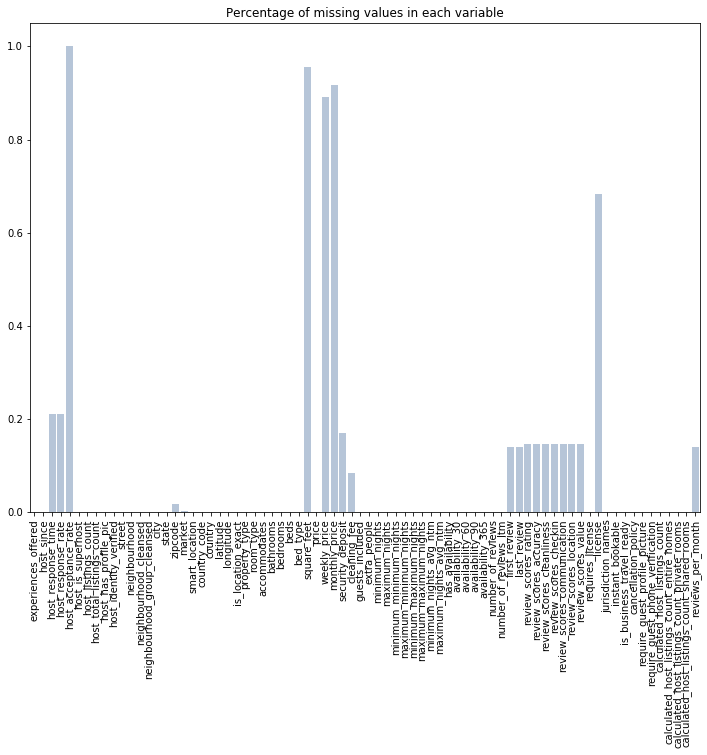

In [153]:
plt.style.use('ggplot')
perc_missing = listings.isnull().sum()/listings.shape[0]
plt.figure(figsize=(12, 9))
g = sns.barplot(listings.columns, perc_missing, color='lightsteelblue')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Percentage of missing values in each variable');

Looking at the graph of the percentage of missing values in each variable, we see that the variables host_acceptance_rate, square_feet, weekly price, monthly price and license have too high a proportion of missing values for them to be useful in the analysis, and are thus dropped.

In [154]:
listings.drop(['host_acceptance_rate','square_feet', 'weekly_price', 'monthly_price', 'license'],
              axis=1, inplace=True)

### Checking unique values

Next, we'll check the number of unique values in each variable and drop those those variables that only have one value.  

In [155]:
for col in listings:
    print(col, listings[col].nunique())

experiences_offered 1
host_since 2430
host_response_time 4
host_response_rate 37
host_is_superhost 2
host_listings_count 69
host_total_listings_count 69
host_has_profile_pic 2
host_identity_verified 2
street 16
neighbourhood 80
neighbourhood_cleansed 89
neighbourhood_group_cleansed 17
city 12
state 3
zipcode 60
market 5
smart_location 16
country_code 1
country 1
latitude 6537
longitude 6215
is_location_exact 2
property_type 30
room_type 4
accommodates 21
bathrooms 15
bedrooms 9
beds 20
bed_type 5
price 400
security_deposit 73
cleaning_fee 207
guests_included 16
extra_people 54
minimum_nights 47
maximum_nights 131
minimum_minimum_nights 46
maximum_minimum_nights 52
minimum_maximum_nights 129
maximum_maximum_nights 129
minimum_nights_avg_ntm 193
maximum_nights_avg_ntm 191
has_availability 1
availability_30 31
availability_60 61
availability_90 91
availability_365 365
number_of_reviews 408
number_of_reviews_ltm 139
first_review 2015
last_review 987
review_scores_rating 41
review_scores_ac

In [156]:
listings.drop(['experiences_offered', 'market', 'country_code', 'country', 'has_availability',
               'requires_license', 'is_business_travel_ready'],
              axis=1, inplace=True)

### Price variables


There are several variables related to prices: price, security deposit, cleaning fee, extra people. Since the price variables are in string format, convert them to floats. It'll also be reasonable to assume that NaNs correspond to prices of 0, so we'll fill 0 in for NaNs.

In [157]:
price_var = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
listings[price_var] = listings[price_var].apply(lambda x: x.str.replace('[^+\d.]', '').astype(float))

In [158]:
#fill NaNs to 0s
listings[price_var[1:]] = listings[price_var[1:]].apply(lambda x: x.fillna(0))

Check for any prices that are 0 and drop these entries.

In [159]:
print('Number of listings with price = 0:', len(listings[listings['price'] == 0]))
listings = listings[listings['price'] != 0]

Number of listings with price = 0: 2


### Host variables

We'll convert the host variables to appropriate formats.
- host_since: this is a datetime variable, convert into a measure of number of days that the host has been on airbnb before data was scraped. 
- host_response_time: categorical variable, replace missing values with its own category.
- host_response_rate: we'll convert to a categorical variable by binning the rates and letting the missing values be a category.
- host_listings_count and host_total_listings_count are the same, so drop one.



In [160]:
#host_since
#convert host_since to datetime variable
listings['host_since'] = pd.to_datetime(listings['host_since']) 
#calculate number of days 
listings['host_days'] = (pd.datetime(2019, 11, 21) - listings['host_since']).astype('timedelta64[D]')
#drop host_since
listings.drop('host_since', axis=1, inplace=True)

In [161]:
#host_response_time
listings['host_response_time'].fillna('unknown', inplace=True)

In [162]:
#host_response_rate
#convert to float
listings['host_response_rate'] = listings['host_response_rate'].str[:-1].astype('float64')

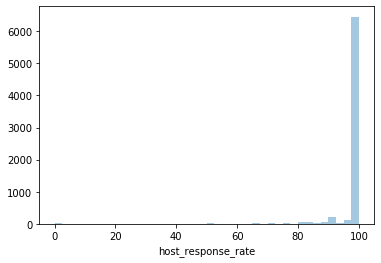

In [163]:
#distribution of response rate
sns.distplot(listings['host_response_rate'].dropna(), bins=40, kde=False);

In [164]:
sum(listings['host_response_rate'] == 100)/len(listings['host_response_rate'])

0.6264272253630417

Looking at the distribution of host_response_rate, it is highly skewed with the bulk of listings (62.6%) having a 100% response rate. Thus, the 100% response rate will be in a category of its own, followed by 90-99%, and 0-89%. 

In [165]:
def bin_column(col, bins, labels, na_label='unknown'):
    listings[col] = pd.cut(listings[col], bins=bins, labels=labels, include_lowest=True)
    listings[col] = listings[col].astype('str')

In [166]:
bin_column('host_response_rate', bins=[0, 89, 99, 100], labels=['0-89%', '90-99%', '100%'])

Taking a look at the missing values in host_is_superhost, we see that the observations with missing in host_is_superhost also has missing values for the other host variables. We'll delete these 4 observations.  

In [167]:
listings[listings['host_is_superhost'].isna()==True]

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days
943,unknown,nan,NaN,NaN,NaN,NaN,NaN,"Seattle, WA, United States",Greenwood,Greenwood,Other neighborhoods,Seattle,WA,98103,"Seattle, WA",47.69722,-122.34876,t,House,Private room,2,1.0,1.0,1.0,Real Bed,42.0,100.0,35.0,2,35.0,3,1125,3,3,1125,1125,3.0,1125.0,19,31,61,318,147,23,2015-03-29,2019-11-17,98.0,10.0,10.0,10.0,10.0,10.0,10.0,"{WASHINGTON,"" Seattle"","" WA""}",t,moderate,f,f,2,0,2,0,2.60,NaN
2375,unknown,nan,NaN,NaN,NaN,NaN,NaN,"Seattle, WA, United States",Greenwood,Greenwood,Other neighborhoods,Seattle,WA,98103,"Seattle, WA",47.69577,-122.34928,t,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,36.0,100.0,35.0,1,0.0,3,1125,3,3,1125,1125,3.0,1125.0,8,29,59,334,71,19,2016-06-28,2019-11-08,98.0,10.0,10.0,10.0,10.0,10.0,10.0,"{WASHINGTON,"" Seattle"","" WA""}",t,moderate,f,f,2,0,2,0,1.71,NaN
6214,unknown,nan,NaN,NaN,NaN,NaN,NaN,"Seattle, WA, United States",Georgetown,Georgetown,Other neighborhoods,Seattle,WA,98108,"Seattle, WA",47.54603,-122.31963,t,House,Entire home/apt,5,1.0,2.0,3.0,Real Bed,125.0,0.0,10.0,1,20.0,2,7,2,2,7,7,2.0,7.0,0,0,0,79,13,8,2018-09-25,2019-08-17,87.0,9.0,9.0,10.0,10.0,10.0,9.0,"{WASHINGTON,"" Seattle"","" WA""}",f,strict_14_with_grace_period,f,f,1,1,0,0,0.92,NaN
7094,unknown,nan,NaN,NaN,NaN,NaN,NaN,"Seattle, WA, United States",North Admiral,North Admiral,West Seattle,Seattle,WA,98126,"Seattle, WA",47.58258,-122.37957,t,Guest suite,Private room,4,1.0,1.0,2.0,Real Bed,75.0,0.0,10.0,1,0.0,1,6,1,1,6,6,1.0,6.0,4,26,46,46,66,66,2019-05-24,2019-11-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,"{WASHINGTON,"" Seattle"","" WA""}",t,flexible,f,f,1,0,1,0,10.88,NaN


In [168]:
listings.dropna(subset=['host_is_superhost'], inplace=True)

### Location variables

The street, latitude, and longitude variables would require more processing to be useful, so they will be dropped. The site that collected the data has already cleaned the neighborhood, so neighborhood_cleansed will be the variable kept.  

In [169]:
listings.drop(['street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state',
               'zipcode', 'smart_location', 'latitude', 'longitude', 'is_location_exact',
               'jurisdiction_names'],
              axis=1, inplace=True)

### Property variables

The property_type variable contains some uncommon property types for which few listings are in. We'll combine some of these property types and leave 3 categories: house, apartment, and other.

In [170]:
listings['property_type'].value_counts()

Apartment             3183
House                 2804
Guest suite            933
Townhouse              687
Condominium            516
Guesthouse             249
Serviced apartment     180
Loft                   105
Bungalow                83
Boutique hotel          59
Cottage                 58
Bed and breakfast       23
Tiny house              22
Other                   19
Boat                    17
Houseboat               14
Camper/RV               13
Cabin                   12
Villa                   10
Hotel                    8
Dome house               6
Tent                     5
Hostel                   3
Yurt                     2
Earth house              1
Chalet                   1
In-law                   1
Treehouse                1
Resort                   1
Aparthotel               1
Name: property_type, dtype: int64

In [171]:
reclass_property_types = {'Townhouse': 'House', 'Condominium': 'Apartment', 'Loft': 'Apartment',
                          'Bungalow': 'House', 'Cottage': 'House',  'Tiny house': 'House', 
                          'Villa': 'House', 'Dome house': 'House', 'Chalet': 'House',
                          'Earth house': 'House'}

listings['property_type'].replace(reclass_property_types, inplace=True)

listings.loc[~listings['property_type'].isin(['House', 'Apartment']), 'property_type'] = 'Other'

### Review variables

The first_review and last_review variables are datetime variables, so we'll convert them into a measure that tells us the number of days since the first review, and number of days since the last review. There is a fairly significant percentage (~15% from the barchart above) of missing values, which makes sense for properties that are new and have yet to be reviewed, so we'll convert the measures to categorical variables with those missing values having a separate category.

In [172]:
listings[['first_review', 'last_review']] = listings[['first_review', 'last_review']].apply(pd.to_datetime)

listings['time_since_first_review'] = (pd.datetime(2019, 11, 21) - listings['first_review']).astype('timedelta64[D]')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


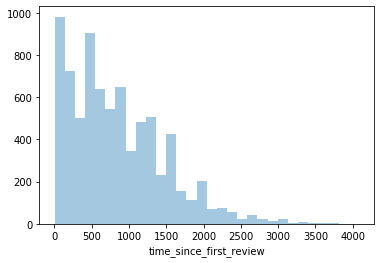

In [173]:
#Distribution of number of days since first review
sns.distplot(listings['time_since_first_review'], bins=30, kde=False);

In [174]:
#binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(listings['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

Do the same for time since last review.

In [175]:
listings['time_since_last_review'] = (pd.datetime(2019, 11, 21) - listings['last_review']).astype('timedelta64[D]')

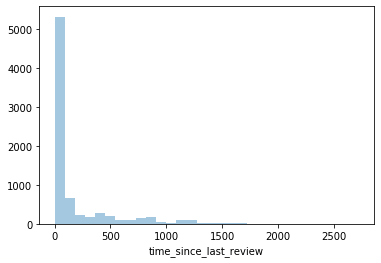

In [176]:
#Distribution of number of days since last review
sns.distplot(listings['time_since_last_review'], bins=30, kde=False);

In [177]:
#binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(listings['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [178]:
#drop first_review and last_review
listings.drop(['first_review', 'last_review'], axis=1, inplace=True)

Similarly, the listings with no reviews will have missing review scores, so we'll turn the review scores into categorical variables with a category for those missing review scores. Looking at the distribution of review scores, a large proportion of reviews are rated either 9 or 10, with few listings having scores of 8 and below. Thus, the categories for the scores will be: 10, 9, and 8 and below. For review_scores_rating, the categories will be: 91-100, 81-90, and 0-80.  

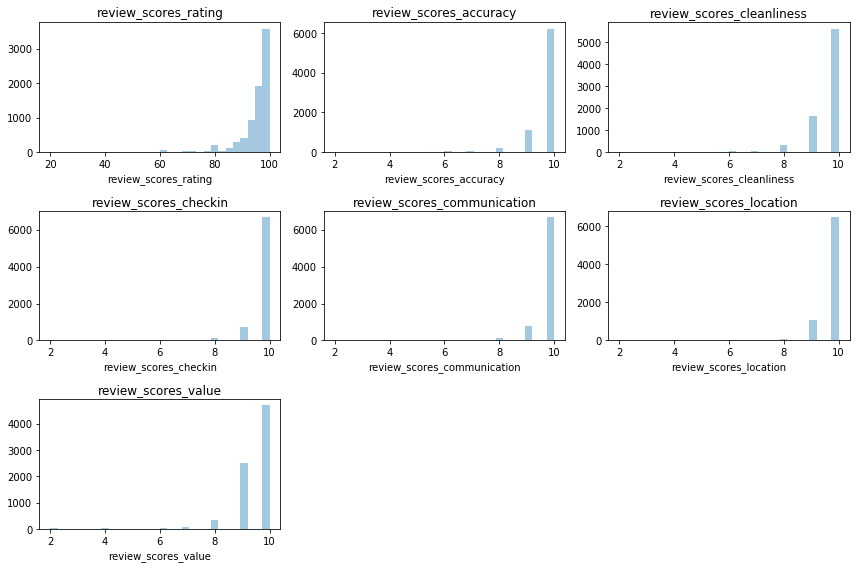

In [179]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(listings.columns[listings.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    sns.distplot(listings[var_name], bins=30, kde=False)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [180]:
#list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [181]:
#binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8', '9', '10'],
               na_label='no reviews')

In [182]:
#binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 91, 100],
           labels=['0-80', '81-90', '91-100'],
           na_label='no reviews')

### Feature selection on correlated features

We would expect a number of variables to be correlated with each other, for example, the availability variables. Let's confirm this with a correlation matrix for numerical variables and see which variables can be dropped. 

In [183]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_listings = listings.select_dtypes(include=numerics)

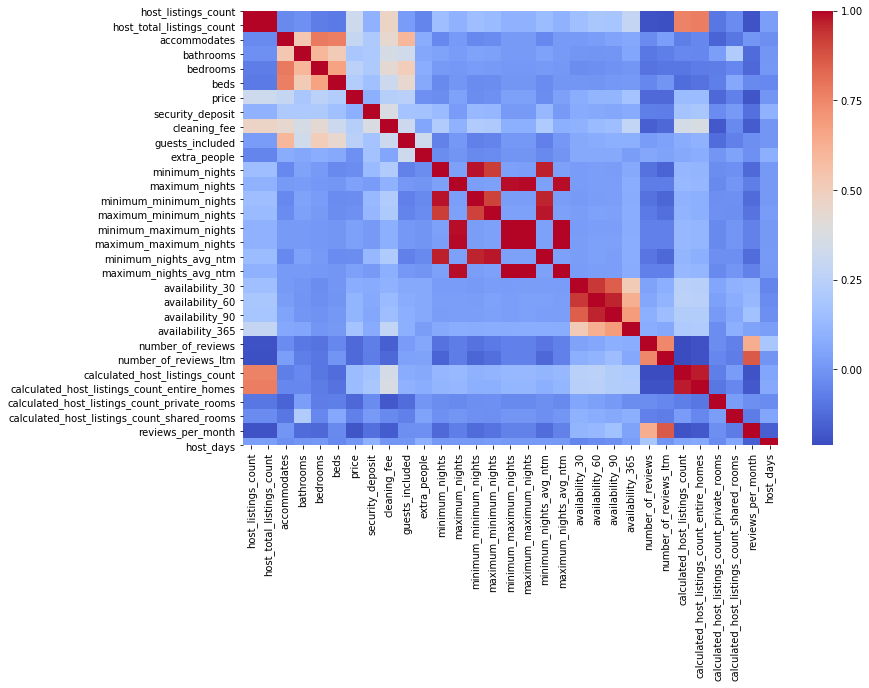

In [184]:
plt.figure(figsize = (12,8))
sns.heatmap(data=num_listings.corr(), cmap='coolwarm');

### Property variables
accomodates is highly correlated with bedrooms and beds. Keep accomodates since it seems reasonable to assume that potential guests would prioritize the number of people a property can accomodate versus the number of bedrooms and beds.

### Minimum/ maximum night variables
The minimum nights and maximum nights variables are highly correlated with each other. A host can adjust minimum_nights and maximum_nights throughout the year, so it seems like the the other variables give us information about this. Since these variables are highly similar to each other, only the minimum_nights and maximum_nights variables, which seem to be the variable that describes the most commonly applied to the listing, will be kept. 

### Availability variables
The availability variables are also highly correlated with each other. Keep availability_365 since it includes information in the other shorter term availability variables.

### Number of reviews variables
number_of_reviews, number_of_reviews_ltm (last 12 months), and reviews per month are highly correlated. Choose to keep number_of_reviews. 

### Host listing counts variables
These variables are highly correlated with each other, especially since calculated_host_listings_count should be the sum of the other calculated_host_listing_count variables for individual property types. Keep only host_total_listing_counts.

In [185]:
to_drop = ['bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
           'minimum_nights_avg_ntm', 'minimum_maximum_nights', 'maximum_maximum_nights',
           'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 
           'number_of_reviews_ltm', 'reviews_per_month', 'host_listings_count',
           'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

listings.drop(to_drop, axis=1, inplace=True)

# Exploratory Data Analysis

We'll explore some questions of interest using the data in this section.

- Which neighborhoods have the highest median prices?

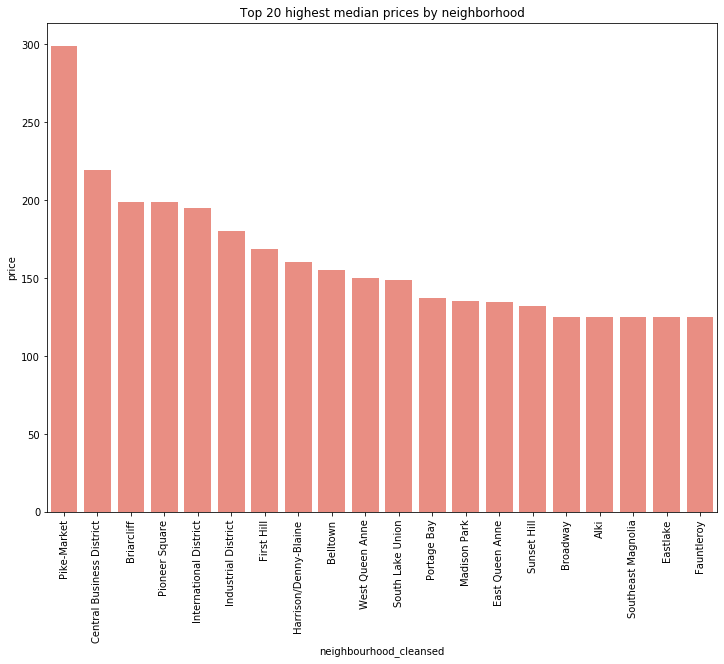

In [186]:
most_ex_neighborhoods = listings.groupby('neighbourhood_cleansed').median()['price'].sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 9))
g = sns.barplot(most_ex_neighborhoods.keys(), most_ex_neighborhoods, color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Top 20 highest median prices by neighborhood');

Neighborhoods close to "Downtown" Seattle attractions unsurprisingly have the most expensive median prices. Pike-Market, the most expensive neighborhood, has a median price of nearly $300 a night. We can take a closer look at the median prices and number of listings by neighborhoods in the map below.

In [187]:
map_df = gpd.read_file('neighborhoods.geojson')

map_df.rename(columns={"name":"neighbourhood_cleansed"}, inplace=True)

#replace names to match listings data
map_df.replace({'Harrison - Denny-Blaine': 'Harrison/Denny-Blaine',
                'North Beach - Blue Ridge': 'North Beach/Blue Ridge'}, inplace=True)

df_by_neighborhood = pd.DataFrame(listings.groupby('neighbourhood_cleansed').size())
df_by_neighborhood.rename(columns={0: 'number_of_listings'}, inplace=True)
df_by_neighborhood['median_price'] = listings.groupby('neighbourhood_cleansed').median()['price']

#joining the dataframes
df_w_map = map_df.set_index('neighbourhood_cleansed').join(df_by_neighborhood)
df_w_map[['number_of_listings', 'median_price']] = df_w_map[['number_of_listings', 'median_price']].apply(lambda x: x.fillna(0))

#filter out neighborhoods with no listings
df_w_map = df_w_map.where(df_w_map['median_price']>0)

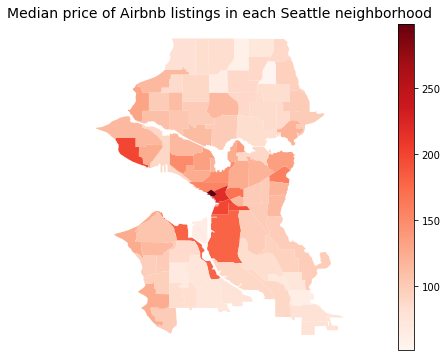

In [188]:
#plotting the median price of listings in each neighborhood
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
df_w_map.plot(column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Seattle neighborhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(df_w_map['median_price']), vmax=max(df_w_map['median_price'])))
sm._A = [] #creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

The neighborhoods surrounding Eliott Bay where the Seattle downtown core is located have some of the highest median prices, as to be expected. The Briarcliffe neighborhood is a notable exception. Although situated further from the downtown core, it has one of the highest median prices.

- Which neighborhoods have the highest number of listings?

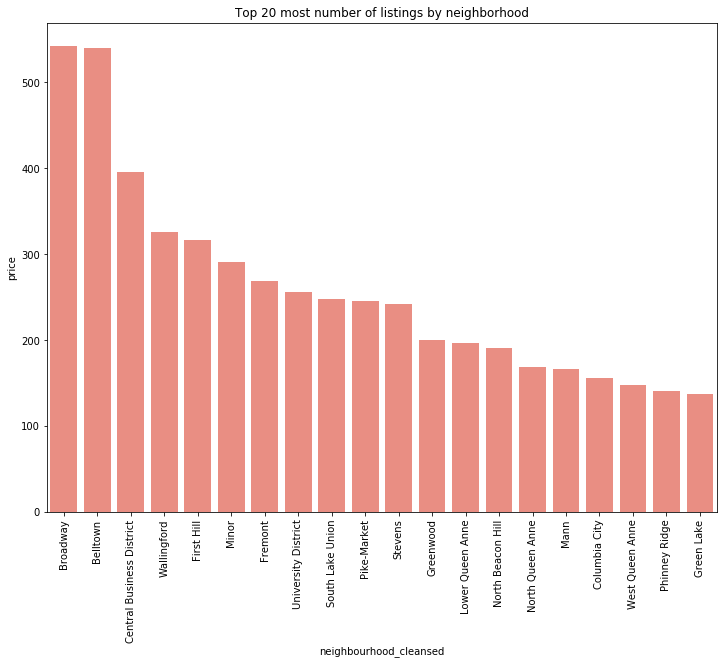

In [189]:
most_num_neighborhoods = listings.groupby('neighbourhood_cleansed')['price'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 9))
g = sns.barplot(most_num_neighborhoods.keys(), most_num_neighborhoods, color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Top 20 most number of listings by neighborhood');

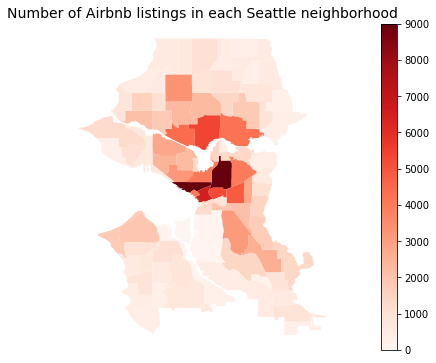

In [190]:
# Plotting the number of listings in each neighborhood
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
df_w_map.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Seattle neighborhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

Broadway and Belltown are the neighborhoods with the highest number of listings. From the map, neighborhoods with higher number of listings are mostly situated to the areas north of the downtown Seattle area. 

- Which are the neighborhoods with the highest and lowest proportions of top review ratings (91-100)? 

In [191]:
count = listings.groupby(['neighbourhood_cleansed', 'review_scores_rating']).count()['host_response_time'].rename("count")
proportion = count/ count.groupby(level=0).sum()

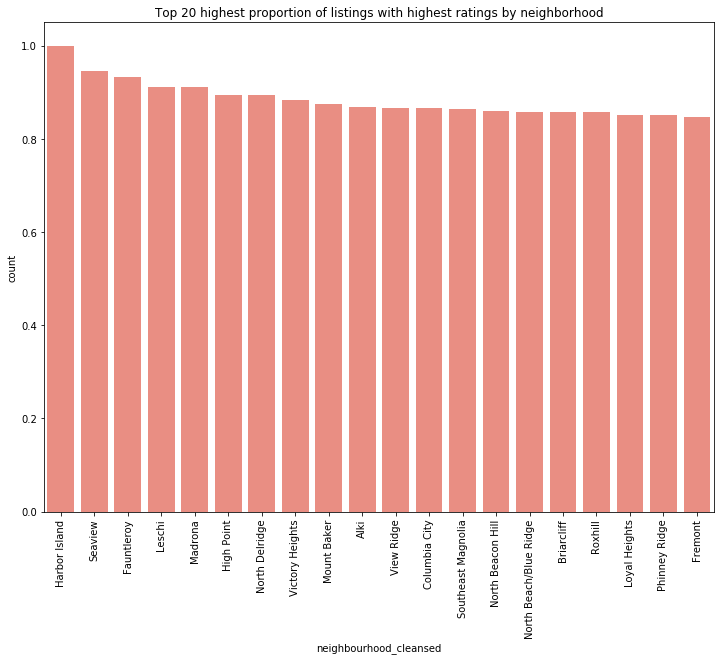

In [192]:
highest_rating_by_neighborhood = proportion[:,'91-100'].sort_values(ascending=False)
plt.figure(figsize=(12, 9))
g = sns.barplot(highest_rating_by_neighborhood.head(20).keys(), highest_rating_by_neighborhood.head(20), color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Top 20 highest proportion of listings with highest ratings by neighborhood');

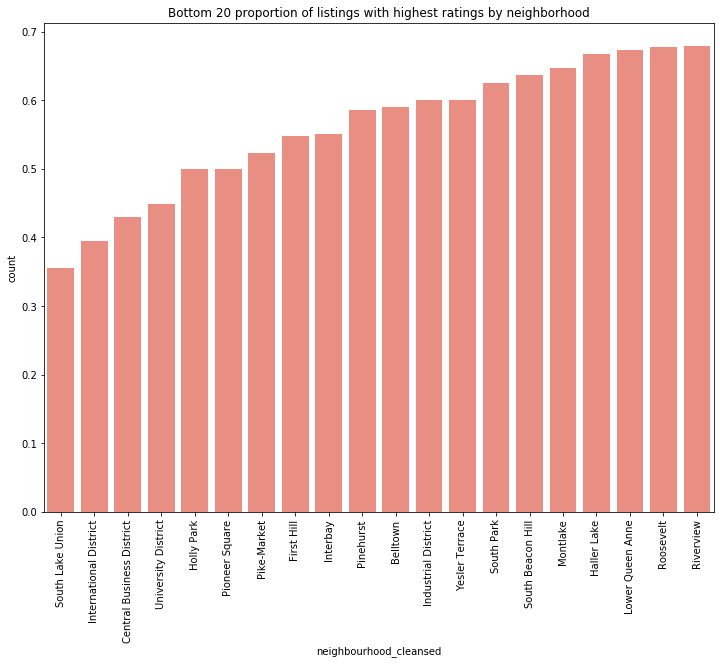

In [193]:
highest_rating_by_neighborhood_low = proportion[:,'91-100'].sort_values()
plt.figure(figsize=(12, 9))
g = sns.barplot(highest_rating_by_neighborhood_low.head(20).keys(), highest_rating_by_neighborhood_low.head(20), color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Bottom 20 proportion of listings with highest ratings by neighborhood');

In [194]:
rating_w_map = map_df.set_index('neighbourhood_cleansed').join(highest_rating_by_neighborhood)

#filter out neighborhoods with no listings
rating_w_map = rating_w_map.where(rating_w_map['count']>0)

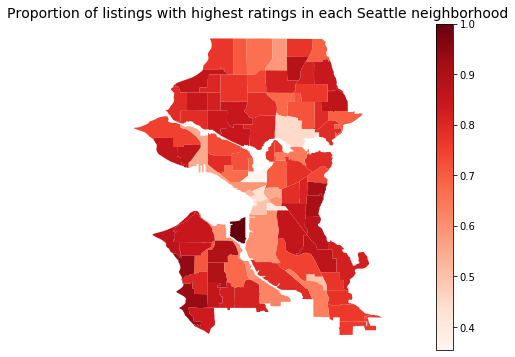

In [195]:
# Plotting the proportion of highest ratings in each neighborhood
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
rating_w_map.plot(column='count', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Proportion of listings with highest ratings in each Seattle neighborhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', 
                           norm=plt.Normalize(vmin=min(rating_w_map['count']),
                                              vmax=max(rating_w_map['count'])))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

The result for Harbor Island should be taken with a grain of salt since it has a total of 1 listing in the area, and since that 1 listing fell into the highest rating bucket, it had the highest proportion (1) of ratings with the highest score. Interestingly, there seems to be an inverse relationship between location near downtown and proportion of listings with the highest ratings. The neighborhoods that are close to downtown and tend to have lower proportions of listings having highest ratings. A notable exception is University District with a relatively low proportion of listings with the highest scores.      

- How do median prices differ accross room types?

In [196]:
price_by_room = listings.groupby('room_type')['price'].median().sort_values(ascending=False)

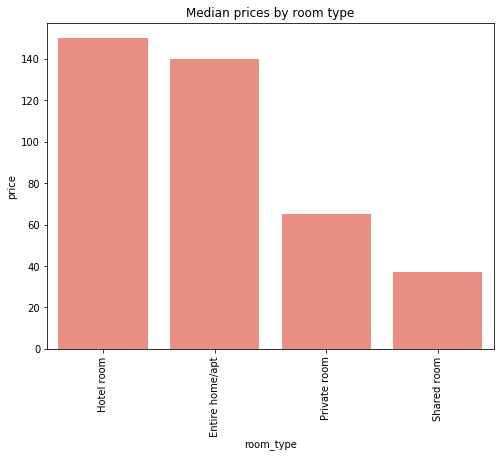

In [197]:
plt.figure(figsize=(8, 6))
g = sns.barplot(price_by_room.keys(), price_by_room, color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Median prices by room type');

Hotel rooms have the highest median price, followed closely by the entire home/apt. The premium for having an entire property is fairly large since the median price of a private room is less than half the median price that of the entire home/apt. Shared rooms unsurprisingly have the lowest median price.

- How does median price vary across number of people accomodated?

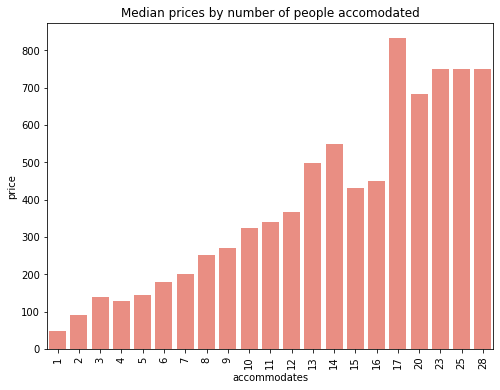

In [198]:
price_by_acc = listings.groupby('accommodates')['price'].median()
plt.figure(figsize=(8, 6))
g = sns.barplot(price_by_acc.keys(), price_by_acc, color='Salmon')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Median prices by number of people accomodated');

Median prices increases in general as a listing accomodates more number of people, as to be exepcted.

- What is the median price of properties which are hosted by superhosts and those that are not?

In [199]:
price_by_superhost = listings.groupby('host_is_superhost')['price'].median()

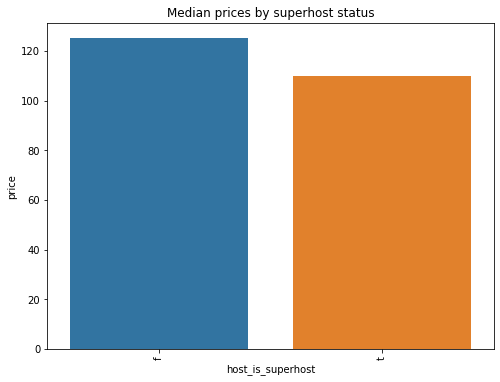

In [200]:
plt.figure(figsize=(8, 6))
g = sns.barplot(price_by_superhost.keys(), price_by_superhost)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Median prices by superhost status');

The median prices by superhost status are roughly around the same, with the superhosts having a slightly lower median price.

- How about having a profile picture?

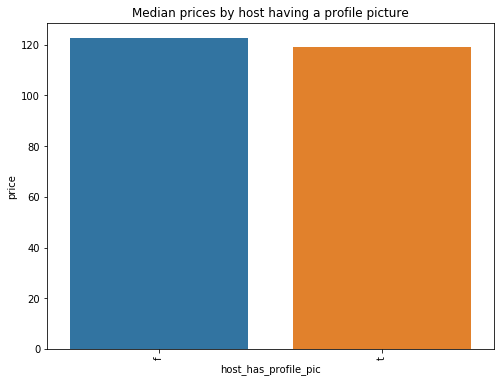

In [201]:
price_by_profile = listings.groupby('host_has_profile_pic')['price'].median()
plt.figure(figsize=(8, 6))
g = sns.barplot(price_by_profile.keys(), price_by_profile)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Median prices by host having a profile picture');

Similarly, there is little difference in median prices for hosts with or without a profile picture.

## Variable transformations
Often price is non-normally distributed, let's see if this happens here.

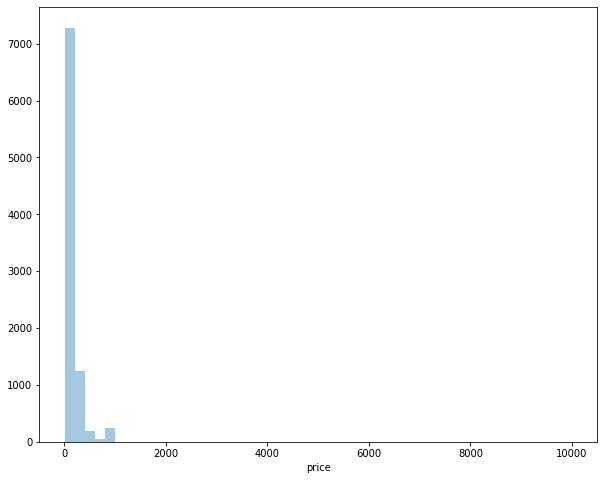

In [202]:
plt.figure(figsize = (10,8))
sns.distplot(listings['price'], kde=False);

Our price variable is indeed highly right-skewed. We'll make a log transformation and use that instead.

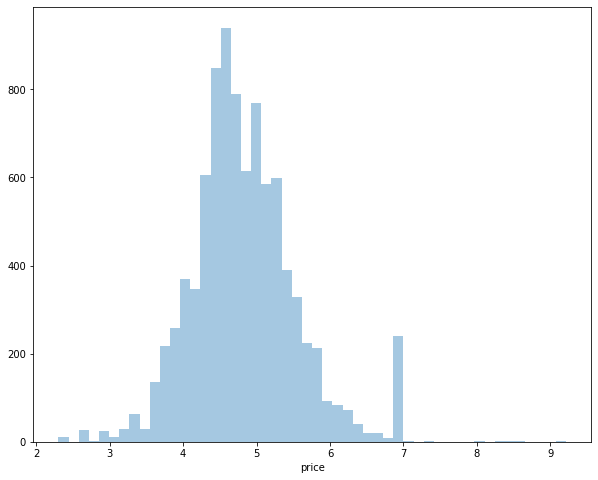

In [203]:
log_price = np.log(listings['price'])
plt.figure(figsize = (10,8))
sns.distplot(log_price, kde=False);
#use the log-transformed price in place of price
listings['price'] = log_price

### Encode categorical variables

Any remaining listings with missing values will be dropped, and categorical variables will be one-hot encoded.

In [204]:
#Check remaining number of missing values
listings[listings.columns[listings.isnull().any()]].isnull().sum()

bathrooms    2
dtype: int64

In [205]:
listings.dropna(subset=['bathrooms'], inplace=True)

In [206]:
#one hot encoding of categorical variables
num_cols = listings.select_dtypes(include=numerics).columns
cat_cols = listings.columns.difference(num_cols)
cat_vars = listings[cat_cols].copy()
cat_feats = pd.get_dummies(cat_vars)
#create clean dataset from processed cat_feats and numerical features
listings_clean = pd.concat([listings[num_cols], cat_feats], axis=1) 
listings_clean.head()

,host_total_listings_count,accommodates,bathrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,host_days,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,host_is_superhost_f,host_is_superhost_t,host_response_rate_0-89%,host_response_rate_100%,host_response_rate_90-99%,host_response_rate_nan,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,instant_bookable_f,instant_bookable_t,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harbor Island,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Rainier View,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier 

### Standardization

Split the dataset to test and train sets.

In [207]:
from sklearn.model_selection import train_test_split
#Define X and y
X = listings_clean.drop('price', axis=1)
y = listings_clean['price']

#split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

Standardize values for regression models.

In [208]:
from sklearn.preprocessing import StandardScaler
#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit Models

We'll try regularized regression models (Ridge and Lasso), as well as random forest due to the ability of these models to handle a large set of predictor variables. We'll compare the models using Median Absolute Error and Root Mean Squared Error.

In [209]:
# import metrics
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
# import models    
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#model evaluation
def evaluate_model(model, X_test_set, y_test_set):
    predictions = model.predict(X_test_set)
    mae = median_absolute_error(predictions, y_test_set)
    rmse = np.sqrt(mean_squared_error(predictions, y_test_set))
    print('Median Absolute Error:', mae)
    print('RMSE:', rmse)

In [210]:
alphas = 10**np.linspace(10,-2,100)*0.5
#Ridge
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print('RidgeCV alpha:', ridge_cv.alpha_)
evaluate_model(ridge_cv, X_test, y_test)

RidgeCV alpha: 37.823166377731454
Median Absolute Error: 0.22450860177777887
RMSE: 0.3973563876614213


In [211]:
#Lasso
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)
print('LassoCV alpha:', lasso_cv.alpha_)
evaluate_model(lasso_cv, X_test, y_test)

LassoCV alpha: 1.566212654997448e-05
Median Absolute Error: 0.2223866677737476
RMSE: 0.3978659665141252


In [213]:
#Random Forest
base_forest = RandomForestRegressor(min_samples_split =5,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = None,
                                max_depth = None,
                                n_estimators = 300,
                                max_features = 'auto')
base_forest.fit(X_train, y_train)
evaluate_model(base_forest, X_test, y_test)

Median Absolute Error: 0.18201267126923515
RMSE: 0.3585433746917646


Random forest has given us the lowest MAE and RMSE, we'll try to tune the parameters to improve on the estimate using randomized search,

In [214]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Fit model
rf_random = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 59.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 130.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [215]:
random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35,
 'bootstrap': False}

In [216]:
#evaluate model from random search
evaluate_model(random_search, X_test, y_test)

Median Absolute Error: 0.17952867617348556
RMSE: 0.3561948212828171


Randomized search has returned the best model so far with the lowest MAE and RMSE. We could further try to tune parameters using grid search around the best parameters returned by random search, but due to time and computing resources, this will be a project for the future.

We can look at variable importance measures returned by the random forest model to see which variables are the most important for predicting price.

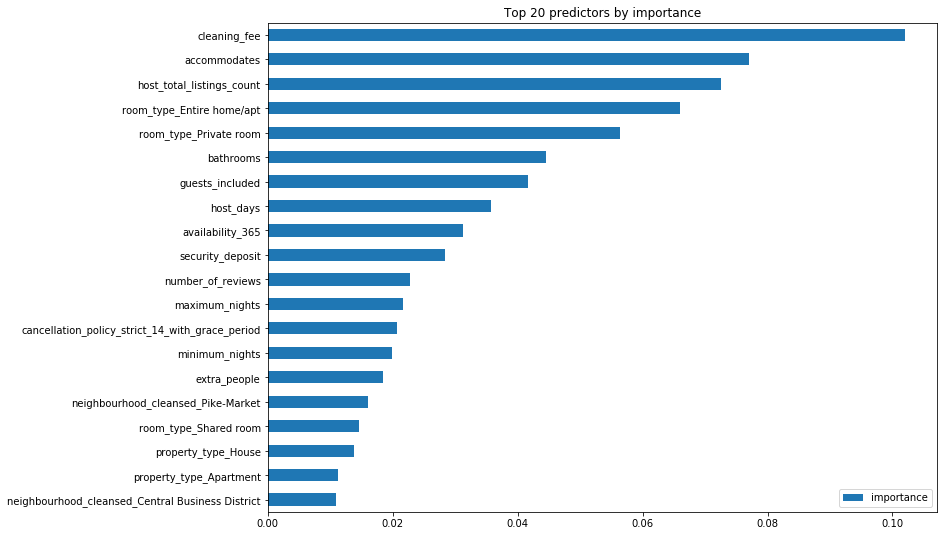

In [251]:
feature_importances = pd.DataFrame(random_search.best_estimator_.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20).sort_values('importance').plot(kind='barh',figsize=(12,9),
                                  title= 'Top 20 predictors by importance');

Cleaning fee, number of people accomodated, host total listings, room type, and number of bathrooms are among the most important features determining price of the listing. While the other variables don't come as a surprise, it is a little surprising that host total listings would feature so highly in the variable importance measures since it is not directly related to the listing itself. It would be interesting to explore the relationship between being an experienced host with more number of listings and price charged for a further analysis. 